# Observing and Cleaning Data

In [4]:
#importing libraries required for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import charset_normalizer

In [7]:
#figuring out the encoding
with open ("C:\Users\Admin\Desktop\Python EDA\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(1000))
print(result)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (40453492.py, line 1)

In [8]:
#reading the csv file in which data is present
df = pd.read_csv(r"C:\Users\Admin\Desktop\Python EDA\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv", encoding="unicode_escape")

(11251, 15)

In [11]:
#printing the number of columns and rows in file
print("File rows:",df.shape[0])
print("File columns:",df.shape[1])

File rows: 11251
File columns: 15


In [14]:
#printing top 10 rows 
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [13]:
#printing information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##### From the information about the columns, we see that column "Status" and "unnamed1" have no data. Thus, we can drop these columns for our ease.

In [15]:
#dropping unnecessary columns
df.drop(["Status","unnamed1"], axis=1, inplace=True)

In [16]:
#checking for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

##### We notice that we have 12 null values in our "Amount" column. As the number of null values is less than the number of cells, we can drop these rows containing null values.

In [18]:
#dropping rows with null values
df.dropna(inplace=True)

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [23]:
#renaming column "Cust_name" to "Customer"
df.rename(columns={"Cust_name": "Customer"}, inplace=True)

In [25]:
#providing statistical description of the data
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis

In [28]:
#printing the column names for ease
df.columns

Index(['User_ID', 'Customer', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Gender

Text(0.5, 1.0, 'Count Plot by Gender')

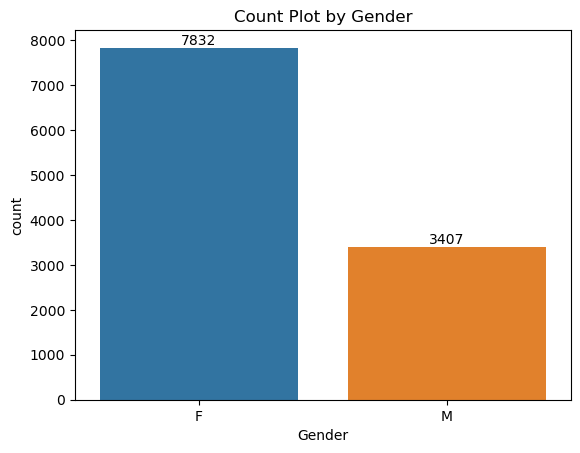

In [32]:
#plotting a bar chart for gender and its count
gender_plot = sns.countplot(x="Gender", data=df)
for bars in gender_plot.containers:
    gender_plot.bar_label(bars)
plt.title("Count Plot by Gender")

Text(0.5, 1.0, 'Amount Spent by Gender')

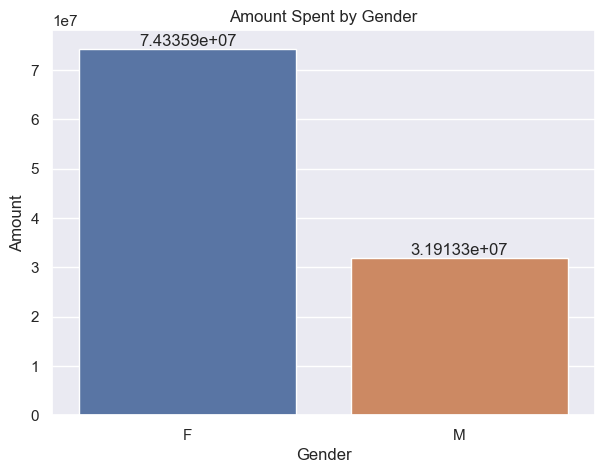

In [75]:
#grouping the data by gender and plotting the amount spent by each gender
sales = df.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.set(rc={'figure.figsize':(7,5)})
sales_plot = sns.barplot(x='Gender', y='Amount', data=sales)
for bars in sales_plot.containers:
    sales_plot.bar_label(bars)
plt.title("Amount Spent by Gender")

In [48]:
#printing sales data and the count of meach gender
count = df.groupby(["Gender"])["Gender"].count()
print(count,"\n")
print(sales)

Gender
F    7832
M    3407
Name: Gender, dtype: int64 

  Gender       Amount
0      F  74335856.43
1      M  31913276.00


In [53]:
#finding the average amount spent by each gender
amount_per_f = sales["Amount"][0]/count[0]
amount_per_m = sales["Amount"][1]/count[1]
print("On average amount spent by a female: ",amount_per_f)
print("On average amount spent by a male: ",amount_per_m)

On average amount spent by a female:  9491.29933988764
On average amount spent by a male:  9366.972703257998


##### From the above analysis on gender, we see that most of the buyers are females. Also, The purchasing power of females is greater.

### Age

Text(0.5, 1.0, 'Count in each Age Group, Gender wise')

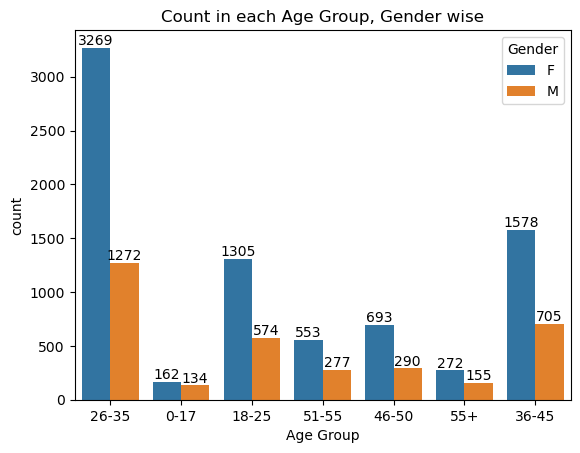

In [56]:
#plotting number of people in each age group, gender wise
age_plot = sns.countplot(data=df, x='Age Group', hue='Gender')
for bars in age_plot.containers:
    age_plot.bar_label(bars)
plt.title("Count in each Age Group, Gender wise")

Text(0.5, 1.0, 'Total Amount Spent vs Age Group')

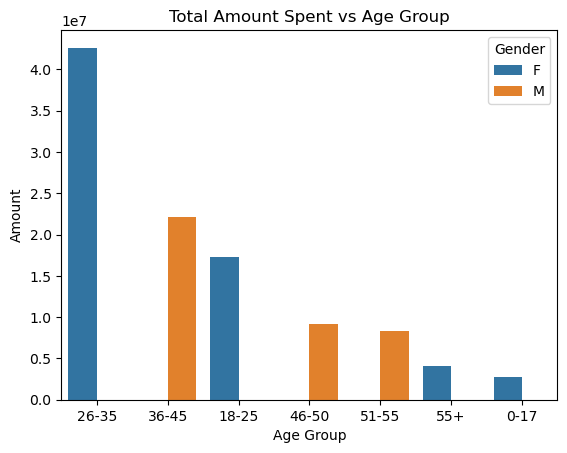

In [63]:
# plotting total amount spent vs agr group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plot = sns.barplot(x ='Age Group', y='Amount', data=sales_age, hue=df["Gender"])
plt.title("Total Amount Spent vs Age Group")

##### We conclude from the data above, that most of the buyers are from the age group 26-35. Also, 26-35 age group in the data, comprises only of females.

### State

Text(0.5, 1.0, 'Number of Orders from Top 8 States')

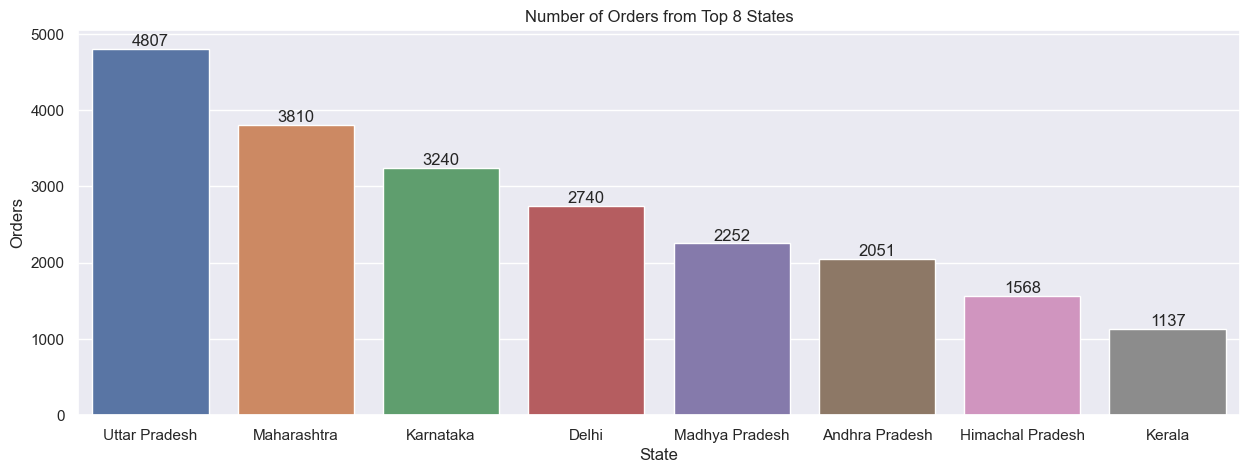

In [67]:
#plotting total number of orders from top 8 states
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(8)
sns.set(rc={'figure.figsize':(15,5)})
state_plot = sns.barplot(data=sales_state, x='State', y='Orders')
for bars in state_plot.containers:
    state_plot.bar_label(bars)
plt.title("Number of Orders from Top 8 States")

Text(0.5, 1.0, 'Sales from Top 8 States')

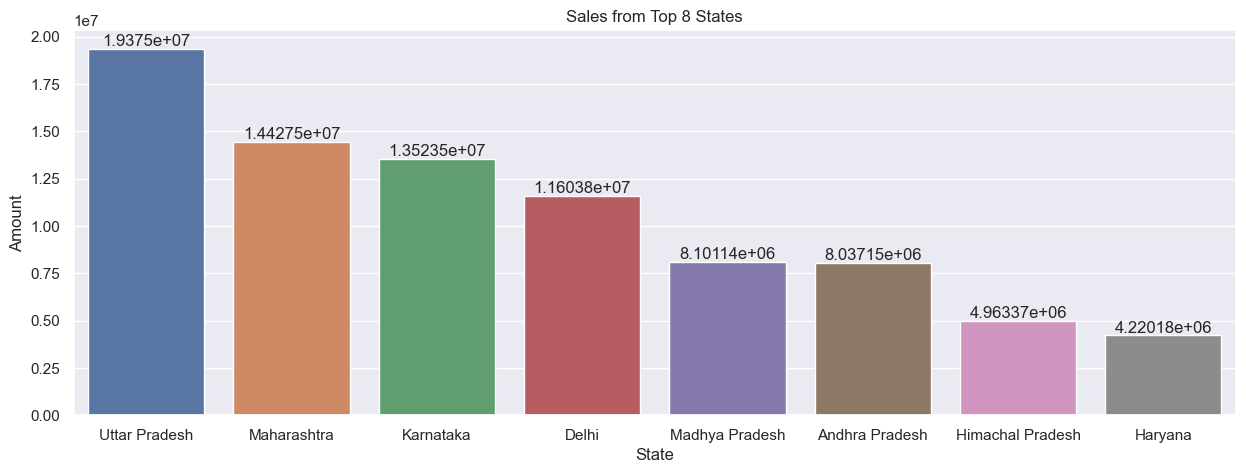

In [78]:
#plotting total amount/sales from top 8 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)
sns.set(rc={'figure.figsize':(15,5)})
sale_state = sns.barplot(data=sales_state, x='State', y='Amount')
for bars in sale_state.containers:
    sale_state.bar_label(bars)
plt.title("Sales from Top 8 States")

##### We conclude from the above analysis that most of the sales as well as orders are from the states of Uttar Pradesh, followed by Maharashtra and Karnataka.

### Maritial Status

Text(0.5, 1.0, 'Maritial Status Stats')

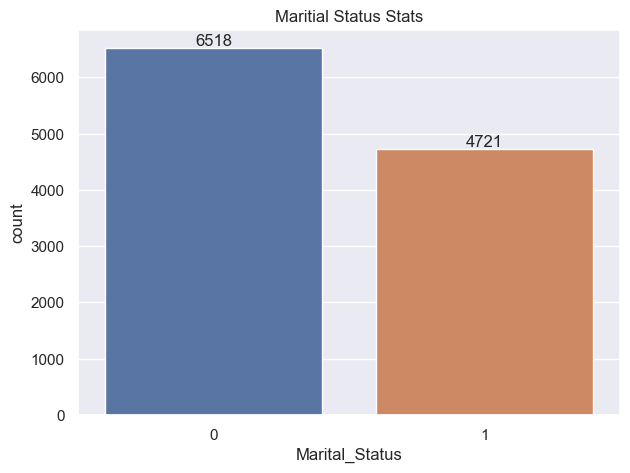

In [80]:
#plotting maritial stats (1 being married and 0 being not married)
mar_plot = sns.countplot(data=df, x='Marital_Status')
for bars in mar_plot.containers:
    mar_plot.bar_label(bars)
plt.title("Maritial Status Stats")

Text(0.5, 1.0, 'Sales by Maritial Status, Gender Wise')

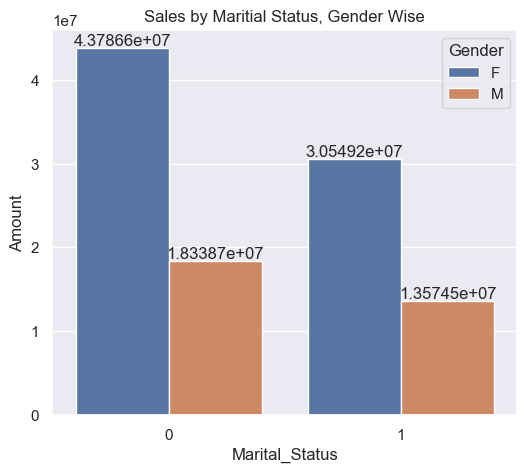

In [84]:
#plotting sales by maritial status, gender wise
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
mar_sales = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender')
for bars in mar_sales.containers:
    mar_sales.bar_label(bars)
plt.title("Sales by Maritial Status, Gender Wise")

##### From above graphs, we see that unmarried people contribute more to the sales than married people, specially females.

### Occupation

Text(0.5, 1.0, 'Count Plot by Occupation')

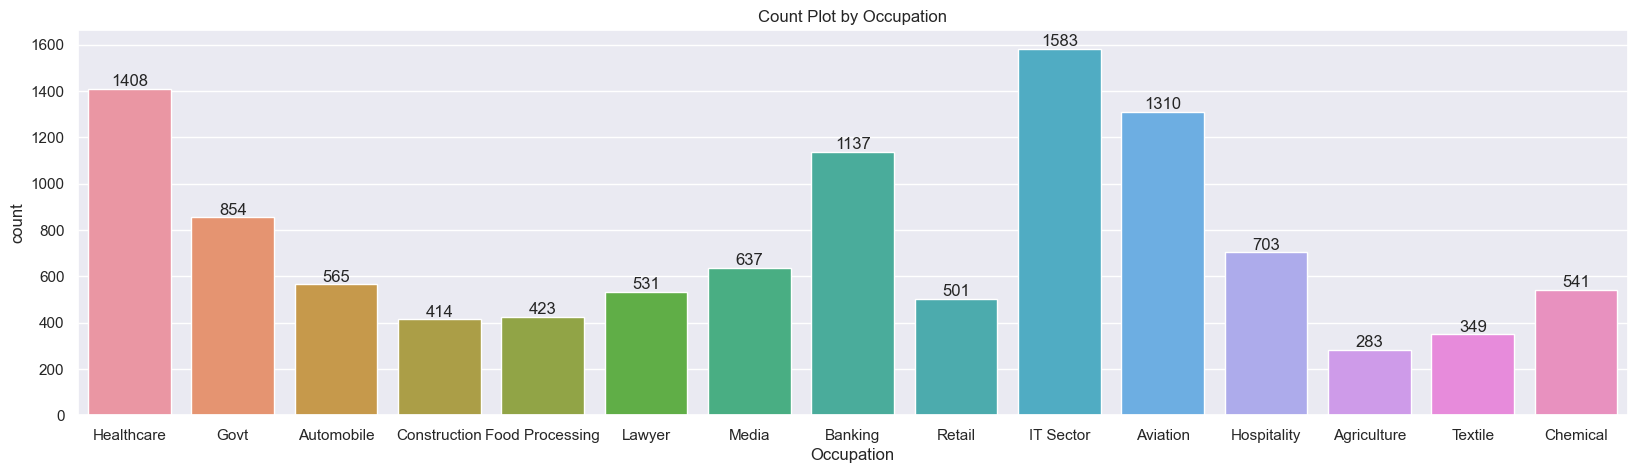

In [85]:
#plotting occupations of customers
sns.set(rc={'figure.figsize':(20,5)})
occ_plot = sns.countplot(data=df, x='Occupation')
for bars in occ_plot.containers:
    occ_plot.bar_label(bars)
plt.title("Count Plot by Occupation")

Text(0.5, 1.0, 'Sales Amount vs Occupation')

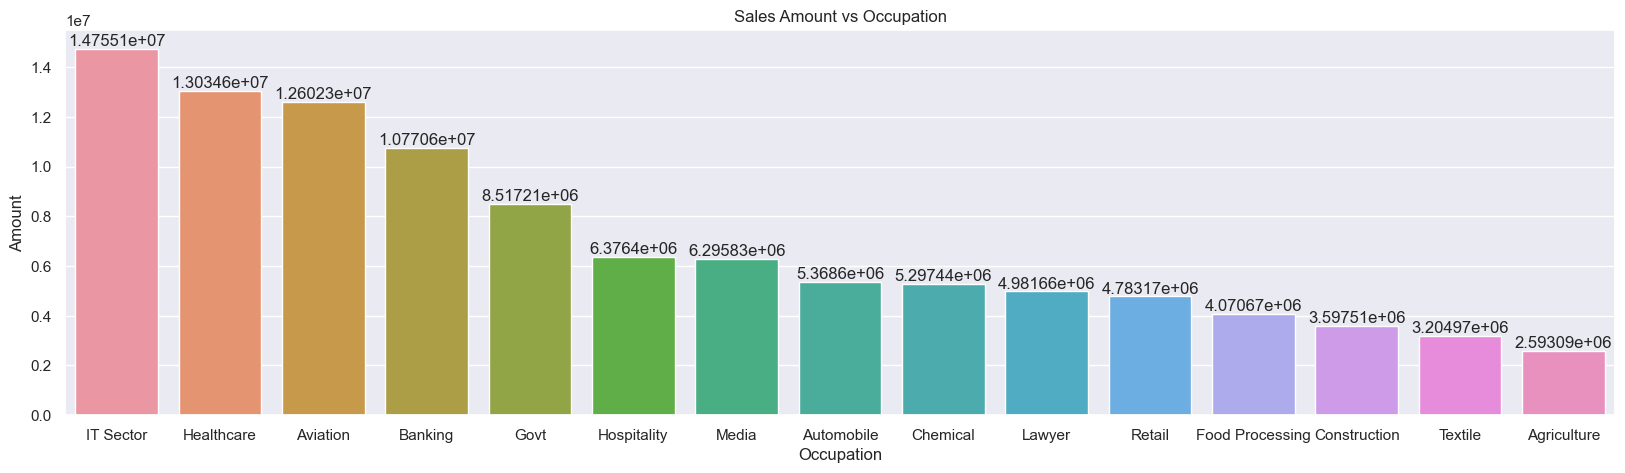

In [86]:
#plotting sales vs occupation
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
state_amt = sns.barplot(data=sales_state, x='Occupation', y='Amount')
for bars in state_amt.containers:
    state_amt.bar_label(bars)
plt.title("Sales Amount vs Occupation")

##### From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector

### Product Category

Text(0.5, 1.0, 'Product Category Count')

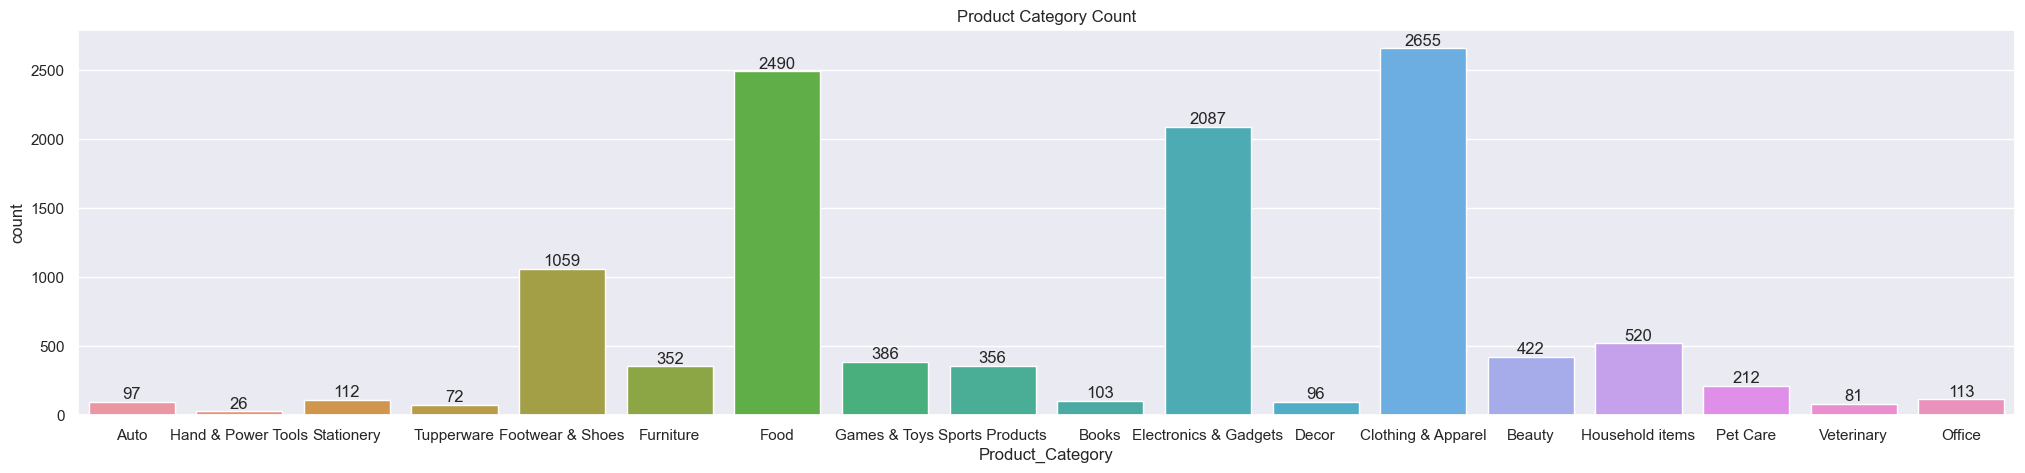

In [94]:
#plotting category by count
sns.set(rc={'figure.figsize':(25,5)})
cat_plot = sns.countplot(data=df, x='Product_Category')
for bars in cat_plot.containers:
    cat_plot.bar_label(bars)
plt.title("Product Category Count")

Text(0.5, 1.0, 'Sales Amount by Product Category')

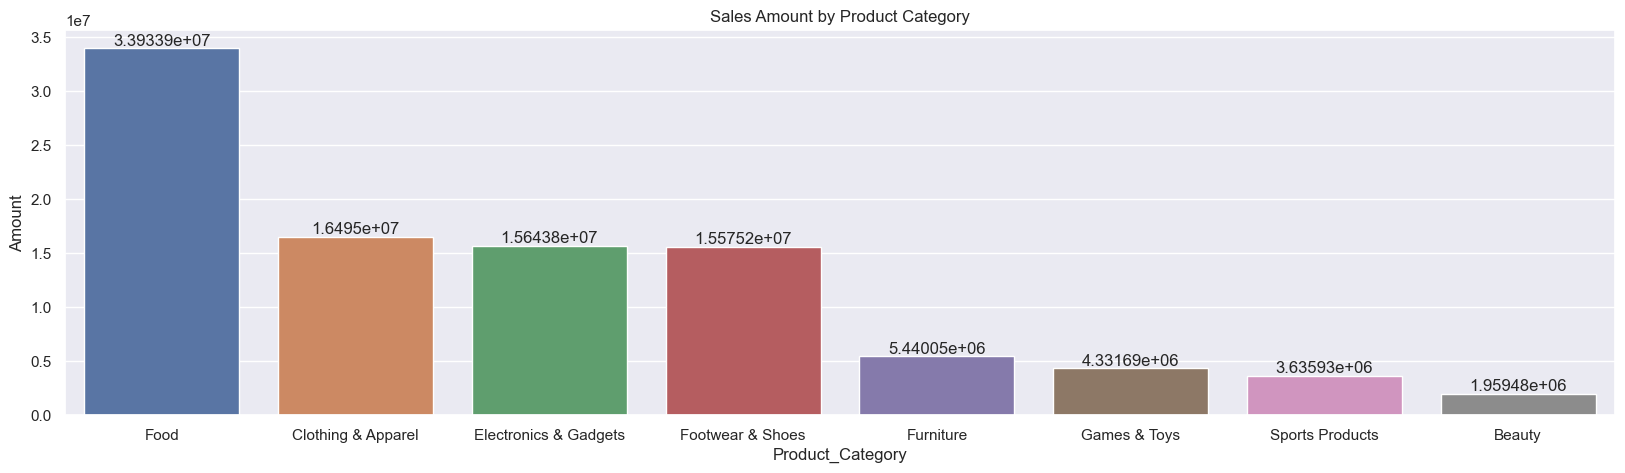

In [97]:
#plotting sales amount by occupation
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(8)
sns.set(rc={'figure.figsize':(20,5)})
prod = sns.barplot(data=sales_state, x='Product_Category', y='Amount')
for bars in prod.containers:
    prod.bar_label(bars)
plt.title("Sales Amount by Product Category")

##### From our analysis, we observe that most orders are made in the Clothing and Apparel category, followed by Food and Electronic Gadgets, but Food category makes the most sales amount.

# Conclusion

##### 1. Most popular Product Categories: Food, Clothing, Electronics
##### 2. Job Sectors from where most Consumers are: IT Sector, Healthcare, Aviation
##### 3. States from where most Consumers are: Uttar Pradesh, Maharashtra, Karnataka
##### 4. Maritial Status of most Consumers: Unmarried
##### 5. Age Group of most Consumers: 26-35